In [1]:
import pandas as pd

In [2]:
# columns names
columns = ['Wine class','Alcohol','Malic_acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
columns

['Wine class',
 'Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [3]:
# load the data 
df = pd.read_csv('wine.data',names=columns)
df.shape

(178, 14)

In [4]:
# read the data
df.head()

,Wine class,Alcohol,Malic_acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# check for missing values in dataset
df.isnull().sum()

Wine class                      0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
# check for outliers in dataset
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

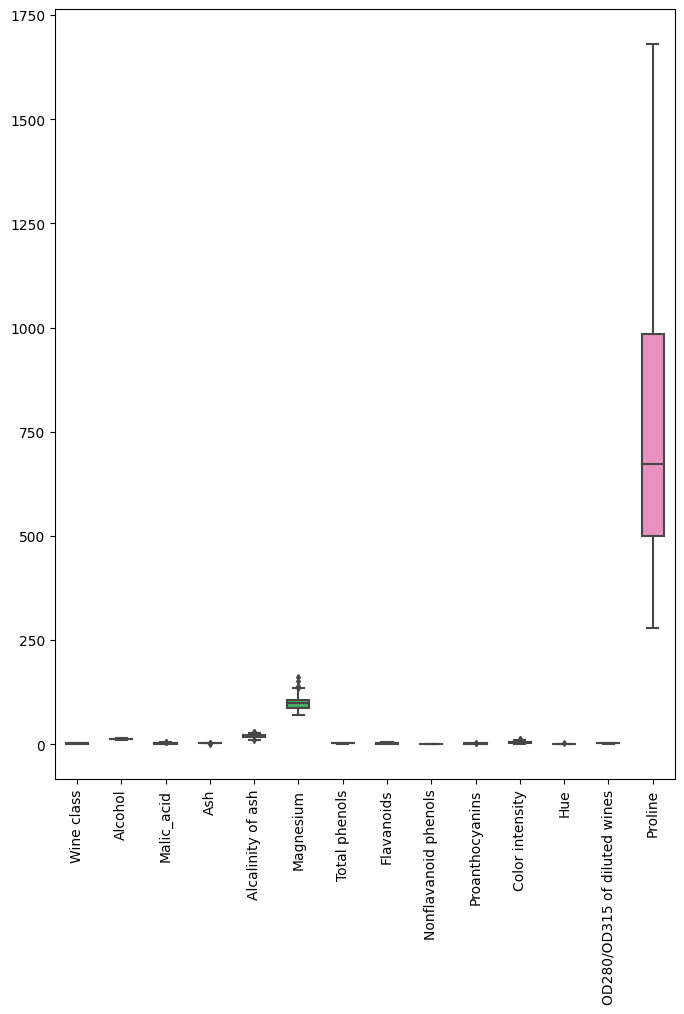

In [7]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df,fliersize=3,width=0.5)
plt.xticks(rotation=90)
plt.show()

In [8]:
# segregate the data into independent and dependent
X = df.drop(columns='Wine class',axis=1)
y = df['Wine class']

In [9]:
# standardization for removing outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
# pca
from sklearn.decomposition import PCA
pca = PCA()

In [12]:
X = pca.fit_transform(X)

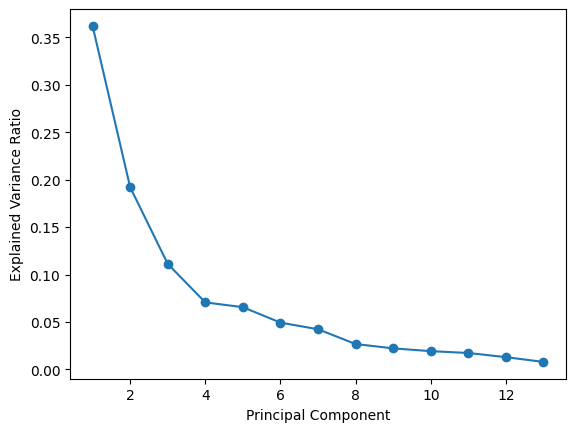

In [13]:
# To determine the optimal number of principal components to retain, we will plot the explained variance ratio.

import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [14]:
# We can see majority variance captured at 2
pca = PCA(n_components=2)

In [15]:
X = pca.fit_transform(X)

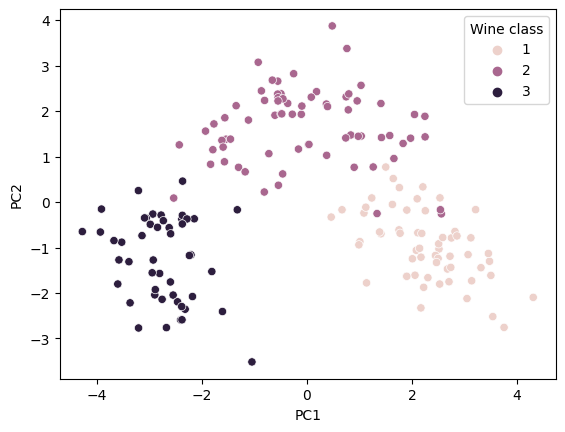

In [17]:
import seaborn as sns

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# model training 

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
# Display the performance metrics for the clustering algorithm
from sklearn.metrics import silhouette_score
metrics = pd.DataFrame({'Metric': ['Inertia', 'Silhouette Score'],
                        'Score': [kmeans.inertia_, silhouette_score(X, kmeans.labels_)]})
print(metrics)

             Metric       Score
0           Inertia  259.509381
1  Silhouette Score    0.561051


Report:

The wine dataset was downloaded from the UCI Machine Learning Repository and loaded into a Pandas dataframe. The dataset contains 178 instances and 13 attributes, including the class attribute.

Data preprocessing was performed to scale the data using the StandardScaler from the scikit-learn library. Principal Component Analysis (PCA) was then performed on the preprocessed dataset using the PCA from the scikit-learn library.

A plot of the explained variance ratio showed that the first two principal components explain the majority of the variance in the data. Therefore, the first two principal components were retained for further analysis. 